In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# data from - https://archive.ics.uci.edu/dataset/186/wine+quality

red_df = pd.read_csv('./wine+quality/winequality-red.csv', sep=';')
white_df = pd.read_csv('./wine+quality/winequality-white.csv', sep=';')

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

In [6]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
wines_df = pd.concat([red_df, white_df], ignore_index=True)

In [9]:
wines_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [10]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
wines_df['wine_type'].value_counts()

wine_type
white    4898
red      1599
Name: count, dtype: int64

In [12]:
wines_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [13]:
wines_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [14]:
# convert wine_type to int

class_mapping = {label: idx for idx, label in enumerate(np.unique(wines_df['wine_type']))}
class_mapping

{'red': 0, 'white': 1}

In [15]:
# to convert class labels from strings to integers
wines_df['wine_type'] = wines_df['wine_type'].map(class_mapping)

In [16]:
wines_df["wine_type"].value_counts()

wine_type
1    4898
0    1599
Name: count, dtype: int64

In [17]:
wine_scaled = StandardScaler().fit_transform(wines_df.iloc[:,:-2])
scaled_wine_df = pd.DataFrame(data=wine_scaled, 
                                columns=wines_df.iloc[:,:-2].columns)
scaled_wine_df[['quality', 'wine_type']] = wines_df[['quality', 'wine_type']]
scaled_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,5,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,5,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,6,0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,6,1
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,5,1
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,6,1
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,7,1


In [18]:
# set up train test data

X = scaled_wine_df.drop(columns='quality')
y = scaled_wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# just testing distributions worked correctly

print("Train set distribution:")
print(y_train.value_counts(normalize=True).sort_index())

print("Test set distribution:")
print(y_test.value_counts(normalize=True).sort_index())

Train set distribution:
quality
3    0.004618
4    0.033288
5    0.329036
6    0.436598
7    0.166057
8    0.029632
9    0.000770
Name: proportion, dtype: float64
Test set distribution:
quality
3    0.004615
4    0.033077
5    0.329231
6    0.436154
7    0.166154
8    0.030000
9    0.000769
Name: proportion, dtype: float64


 1) alcohol                        0.120919
 2) density                        0.103140
 3) volatile acidity               0.100142
 4) total sulfur dioxide           0.090771
 5) sulphates                      0.086504
 6) chlorides                      0.085757
 7) residual sugar                 0.084760
 8) pH                             0.084519
 9) free sulfur dioxide            0.084419
10) citric acid                    0.079277
11) fixed acidity                  0.075939
12) wine_type                      0.003853


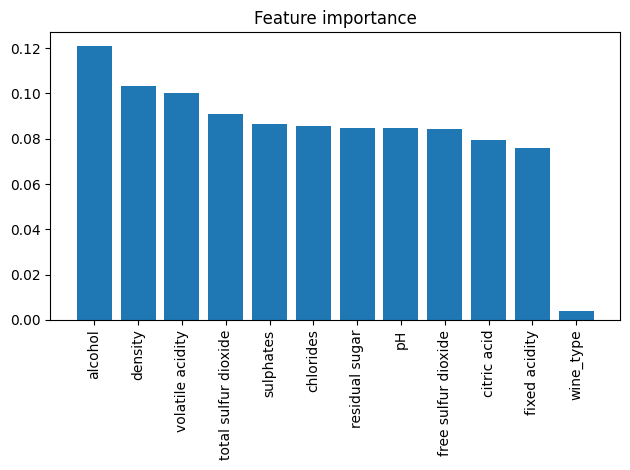

In [20]:
feat_labels = X_train.columns

forest = RandomForestClassifier(n_estimators=200,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [21]:
# dropping wine_type as a feature

data_sets = [X_train, X_test, y_train, y_test]

for set in data_sets:
    set.drop(columns='wine_type', inplace=True)

In [22]:
feat_labels = X_train.columns

In [23]:
# First Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Train set accuracy: 1.0
Test set accuracy: 0.6815384615384615


In [24]:
for depth in range(5, 41, 5):
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=depth)
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred_train = rf_classifier.predict(X_train)
    y_pred_test = rf_classifier.predict(X_test)
    # Evaluate the accuracy of the classifier
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Max Depth = {depth}")
    print("Train set accuracy:", train_accuracy)
    print("Test set accuracy:", test_accuracy)

Max Depth = 5
Train set accuracy: 0.5811044833557821
Test set accuracy: 0.5484615384615384
Max Depth = 10
Train set accuracy: 0.8227823744467962
Test set accuracy: 0.6307692307692307
Max Depth = 15
Train set accuracy: 0.99345776409467
Test set accuracy: 0.69
Max Depth = 20
Train set accuracy: 1.0
Test set accuracy: 0.6876923076923077
Max Depth = 25
Train set accuracy: 1.0
Test set accuracy: 0.6861538461538461
Max Depth = 30
Train set accuracy: 1.0
Test set accuracy: 0.6846153846153846
Max Depth = 35
Train set accuracy: 1.0
Test set accuracy: 0.686923076923077
Max Depth = 40
Train set accuracy: 1.0
Test set accuracy: 0.693076923076923


In [25]:
for samples in range(1, 10):
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_leaf=samples)
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred_train = rf_classifier.predict(X_train)
    y_pred_test = rf_classifier.predict(X_test)
    # Evaluate the accuracy of the classifier
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Min Samples Leaf = {samples}")
    print("Train set accuracy:", train_accuracy)
    print("Test set accuracy:", test_accuracy)

Min Samples Leaf = 1
Train set accuracy: 1.0
Test set accuracy: 0.6892307692307692
Min Samples Leaf = 2
Train set accuracy: 0.9859534346738503
Test set accuracy: 0.683076923076923
Min Samples Leaf = 3
Train set accuracy: 0.9341928035405042
Test set accuracy: 0.6584615384615384
Min Samples Leaf = 4
Train set accuracy: 0.8872426399846065
Test set accuracy: 0.6569230769230769
Min Samples Leaf = 5
Train set accuracy: 0.8558783913796421
Test set accuracy: 0.6515384615384615
Min Samples Leaf = 6
Train set accuracy: 0.8198960939003271
Test set accuracy: 0.6407692307692308
Min Samples Leaf = 7
Train set accuracy: 0.8018087358091206
Test set accuracy: 0.6384615384615384
Min Samples Leaf = 8
Train set accuracy: 0.7802578410621512
Test set accuracy: 0.6276923076923077
Min Samples Leaf = 9
Train set accuracy: 0.7652491822205119
Test set accuracy: 0.6338461538461538


In [26]:
for samples in range(2, 15):
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_split=samples)
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred_train = rf_classifier.predict(X_train)
    y_pred_test = rf_classifier.predict(X_test)
    # Evaluate the accuracy of the classifier
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Min Samples Split = {samples}")
    print("Train set accuracy:", train_accuracy)
    print("Test set accuracy:", test_accuracy)

Min Samples Split = 2
Train set accuracy: 1.0
Test set accuracy: 0.683076923076923
Min Samples Split = 3
Train set accuracy: 1.0
Test set accuracy: 0.6846153846153846
Min Samples Split = 4
Train set accuracy: 0.9990379064845103
Test set accuracy: 0.6915384615384615
Min Samples Split = 5
Train set accuracy: 0.9948046950163556
Test set accuracy: 0.686923076923077
Min Samples Split = 6
Train set accuracy: 0.9884548778141236
Test set accuracy: 0.6838461538461539
Min Samples Split = 7
Train set accuracy: 0.9751779873003656
Test set accuracy: 0.6723076923076923
Min Samples Split = 8
Train set accuracy: 0.9636328651144891
Test set accuracy: 0.6676923076923077
Min Samples Split = 9
Train set accuracy: 0.9501635558976332
Test set accuracy: 0.676923076923077
Min Samples Split = 10
Train set accuracy: 0.938041177602463
Test set accuracy: 0.6692307692307692
Min Samples Split = 11
Train set accuracy: 0.9284202424475659
Test set accuracy: 0.6553846153846153
Min Samples Split = 12
Train set accuracy:

In [27]:
for estimators in range(25, 300, 25):
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=estimators)
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred_train = rf_classifier.predict(X_train)
    y_pred_test = rf_classifier.predict(X_test)
    # Evaluate the accuracy of the classifier
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Number of Trees = {estimators}")
    print("Train set accuracy:", train_accuracy)
    print("Test set accuracy:", test_accuracy)

Number of Trees = 25
Train set accuracy: 0.9988454877814124
Test set accuracy: 0.683076923076923
Number of Trees = 50
Train set accuracy: 1.0
Test set accuracy: 0.6884615384615385
Number of Trees = 75
Train set accuracy: 1.0
Test set accuracy: 0.6815384615384615
Number of Trees = 100
Train set accuracy: 1.0
Test set accuracy: 0.6746153846153846
Number of Trees = 125
Train set accuracy: 1.0
Test set accuracy: 0.696923076923077
Number of Trees = 150
Train set accuracy: 1.0
Test set accuracy: 0.6892307692307692
Number of Trees = 175
Train set accuracy: 1.0
Test set accuracy: 0.6853846153846154
Number of Trees = 200
Train set accuracy: 1.0
Test set accuracy: 0.69
Number of Trees = 225
Train set accuracy: 1.0
Test set accuracy: 0.683076923076923
Number of Trees = 250
Train set accuracy: 1.0
Test set accuracy: 0.6961538461538461
Number of Trees = 275
Train set accuracy: 1.0
Test set accuracy: 0.686923076923077


In [28]:
# Final Random Forest from different tests

rf_classifier = RandomForestClassifier(n_estimators=225, max_depth=30)
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Train set accuracy: 1.0
Test set accuracy: 0.7


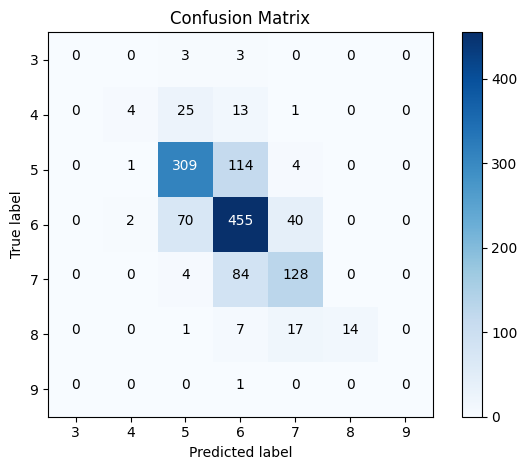

In [29]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
# Define class labels
classes = np.sort(y_test.unique())
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
# Fill in confusion matrix with values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()

In [30]:
report = classification_report(y_test, y_pred_test, labels=classes, zero_division=0.0)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.57      0.09      0.16        43
           5       0.75      0.72      0.74       428
           6       0.67      0.80      0.73       567
           7       0.67      0.59      0.63       216
           8       1.00      0.36      0.53        39
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.52      0.37      0.40      1300
weighted avg       0.70      0.70      0.69      1300

